In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append( '/content/drive/MyDrive/CS 480 Kaggle Competition/PlantTraits2024/src')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
data_path = os.getcwd()
df_train = pd.read_csv('/content/drive/MyDrive/CS 480 Kaggle Competition/data/train.csv')
df_train['path'] = '/content/drive/MyDrive/CS 480 Kaggle Competition/data/train.csv' + df_train['id'].astype(str) + '.jpeg'
df_test = pd.read_csv('/content/drive/MyDrive/CS 480 Kaggle Competition/data/test.csv')
df_test['path'] = '/content/drive/MyDrive/CS 480 Kaggle Competition/data/test.csv' + df_test['id'].astype(str) + '.jpeg'

In [7]:
df_train

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean,path
0,101801795,21.478968,772.404785,110.047623,56.210766,161.457764,13.886666,129,141,134,...,0.419139,0.404626,0.403707,1.035657,142.521015,19699.923668,3465.054691,15.842202,399384.490146,/content/drive/MyDrive/CS 480 Kaggle Competiti...
1,115813315,26.927639,1456.733276,329.366669,109.906487,178.745422,19.846668,139,140,140,...,0.368997,0.391109,0.407680,0.980728,153.726248,19699.721088,3462.940457,14.456965,398961.220402,/content/drive/MyDrive/CS 480 Kaggle Competiti...
2,173551949,27.336945,992.366638,248.166672,115.545128,292.781219,23.486668,144,143,148,...,0.289911,0.337495,0.393714,1.373851,137.016532,19702.276217,3459.473270,15.833161,397614.158049,/content/drive/MyDrive/CS 480 Kaggle Competiti...
3,148811120,25.558649,2246.017822,329.342224,56.563957,211.065521,16.768000,116,132,122,...,0.566320,0.556564,0.512105,0.790627,162.022021,19702.424188,3480.277051,14.684226,402414.611731,/content/drive/MyDrive/CS 480 Kaggle Competiti...
4,195108876,25.204723,2309.776123,284.576202,39.409706,36.499138,10.257143,100,113,105,...,0.628594,0.644814,0.654979,1.004912,154.428170,19701.160757,3487.689253,15.023368,404405.289639,/content/drive/MyDrive/CS 480 Kaggle Competiti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43358,172502909,25.551382,3294.408203,353.204071,47.970898,75.369301,12.087244,105,114,108,...,0.502823,0.497064,0.487178,1.032267,147.941775,19699.332901,3459.412566,14.273777,398262.005212,/content/drive/MyDrive/CS 480 Kaggle Competiti...
43359,183294324,24.163185,908.924438,238.119995,110.597702,120.009247,14.226222,132,141,137,...,0.417601,0.417884,0.424877,1.257809,143.195229,19716.303835,3548.911496,15.143285,402365.630661,/content/drive/MyDrive/CS 480 Kaggle Competiti...
43360,108577580,23.165426,57.146667,10.146667,52.789906,473.979675,26.604889,138,143,138,...,0.187665,0.178380,0.170875,0.897972,153.277343,19699.259529,3459.489300,14.899656,397843.108882,/content/drive/MyDrive/CS 480 Kaggle Competiti...
43361,139067673,15.147365,804.086731,163.000000,92.718536,182.917358,22.998470,122,128,129,...,0.424777,0.395074,0.371460,0.933451,153.229181,19699.217682,3459.441127,14.830224,397663.256983,/content/drive/MyDrive/CS 480 Kaggle Competiti...


In [8]:
#all columns must be identical to be consider the same species
trait_columns = ['X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean']
aux_columns = list(
            map(lambda x: x.replace("mean", "sd"), trait_columns)
        )
metadata_cols = df_train.drop(
                columns=["id", "path"] + trait_columns
            ).columns

In [11]:
for col in trait_columns:
    upper_quantile = df_train[col].quantile(0.98)
    df_train = df_train[(df_train[col] < upper_quantile)]
    df_train = df_train[(df_train[col] > 0)]

# Data Visualization of variables to be predicted

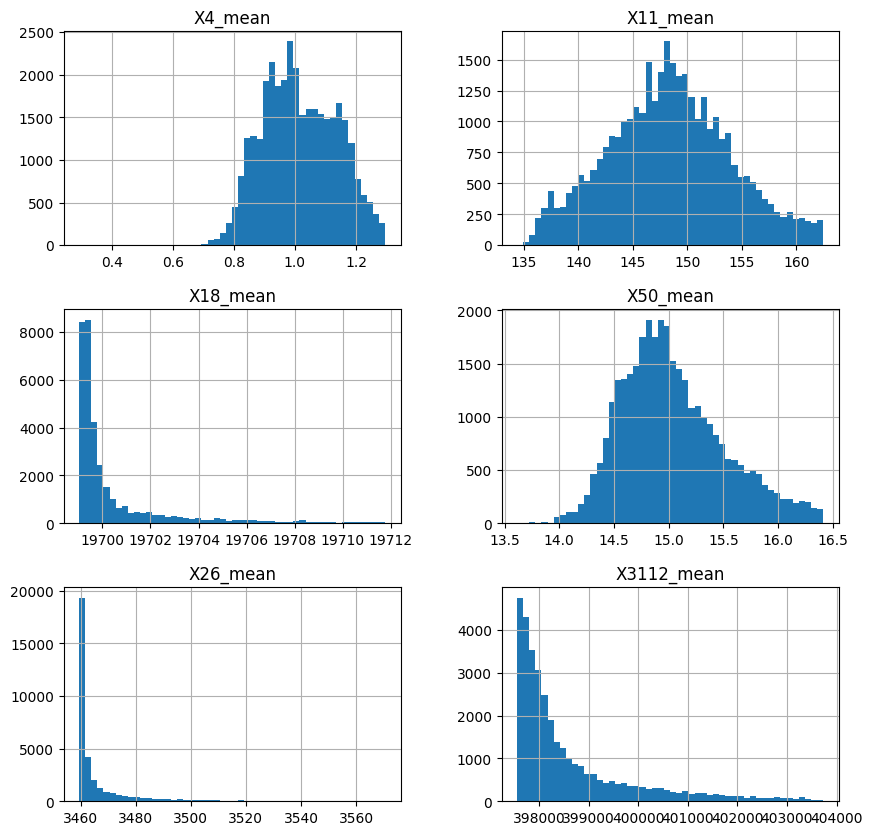

In [56]:
df_train[trait_columns].hist(bins=50, figsize=(10, 10))
plt.show()


In [48]:
def visualize(df_train, colQuery):
  climate_cols = df_train.filter(like=colQuery)
  fig, axs = plt.subplots(nrows=len(climate_cols.columns), ncols=1, figsize=(10, 70))

  # loop through each column and create a histogram
  for i, col in enumerate(climate_cols.columns):
      axs[i].hist(climate_cols[col], bins=50, alpha=0.7, edgecolor = 'black')
      axs[i].set_title(col)
      axs[i].set_xlabel('Value')
      axs[i].set_ylabel('Frequency')
      axs[i].grid(True, axis='y', linestyle='--', alpha=0.5)

  # adjust the layout to avoid overlapping titles
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


  # show the plot
  plt.show()

#WORLDCLIM_BIO* Data Visualization


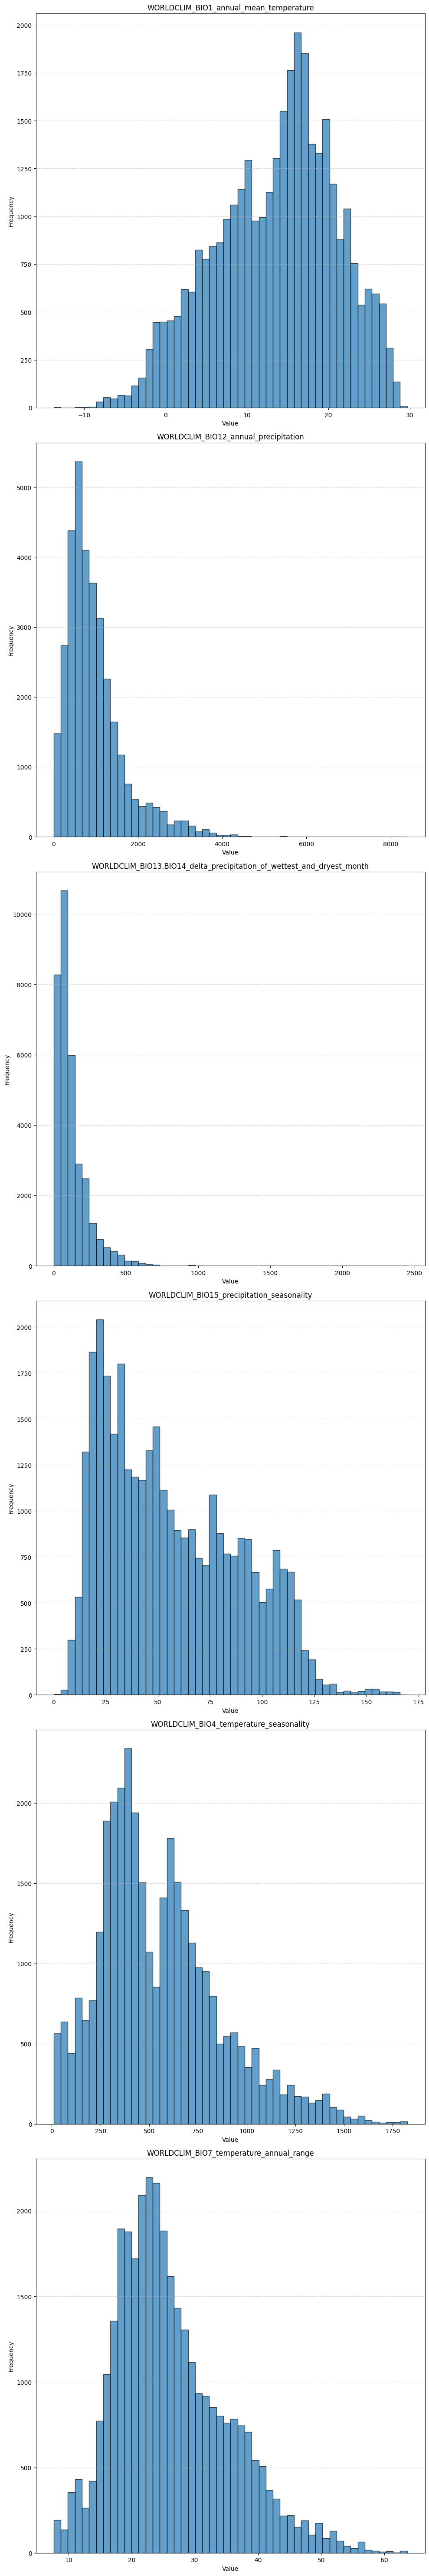

In [54]:
visualize(df_train, 'WORLDCLIM_BIO')

#SOIL_bdod* Data Visualization


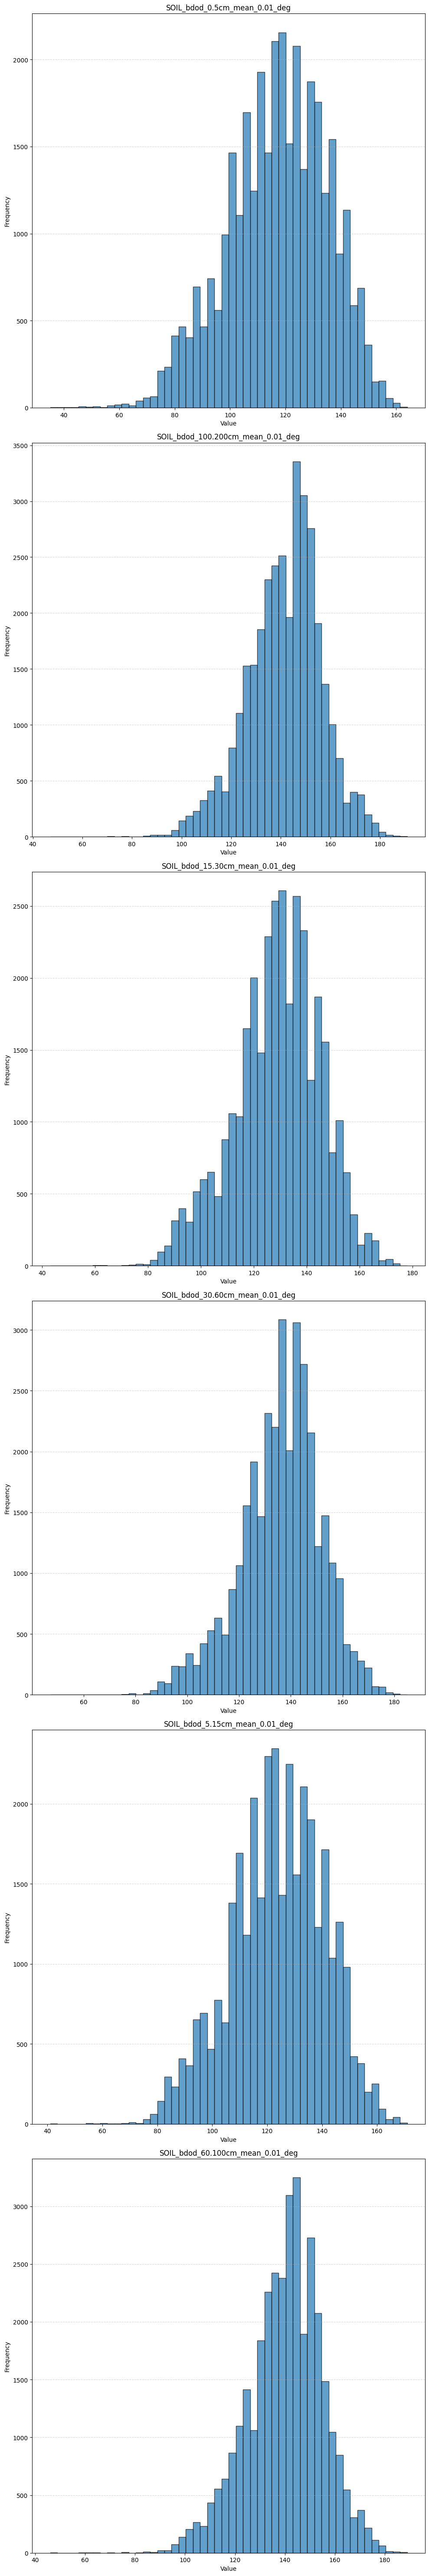

In [53]:
visualize(df_train, 'SOIL_bdod')

# VOD Data Visualization

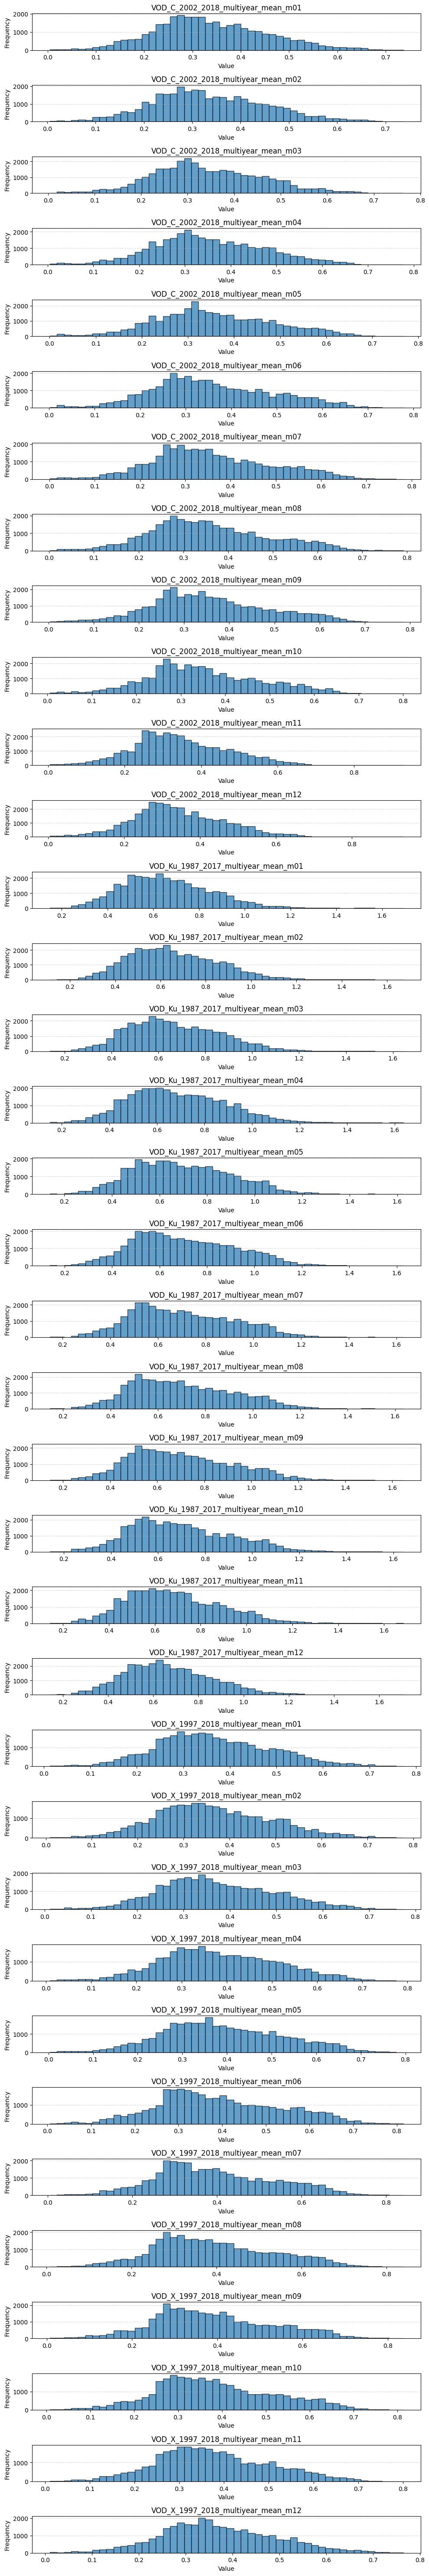

In [52]:
visualize(df_train, 'VOD')

# MODI visualization

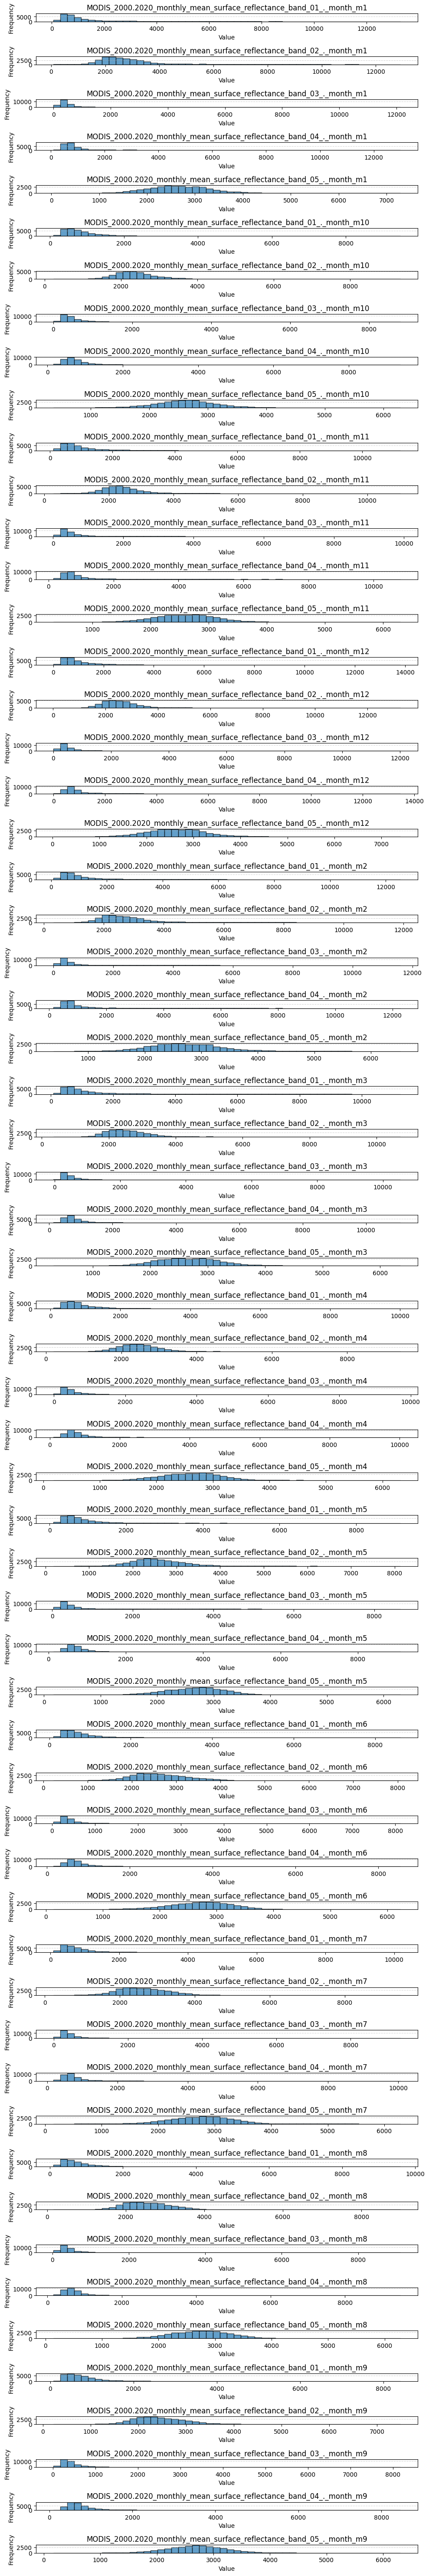

In [51]:
visualize(df_train, 'MODIS')

In [36]:
print(df_train.columns.tolist())

['id', 'WORLDCLIM_BIO1_annual_mean_temperature', 'WORLDCLIM_BIO12_annual_precipitation', 'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month', 'WORLDCLIM_BIO15_precipitation_seasonality', 'WORLDCLIM_BIO4_temperature_seasonality', 'WORLDCLIM_BIO7_temperature_annual_range', 'SOIL_bdod_0.5cm_mean_0.01_deg', 'SOIL_bdod_100.200cm_mean_0.01_deg', 'SOIL_bdod_15.30cm_mean_0.01_deg', 'SOIL_bdod_30.60cm_mean_0.01_deg', 'SOIL_bdod_5.15cm_mean_0.01_deg', 'SOIL_bdod_60.100cm_mean_0.01_deg', 'SOIL_cec_0.5cm_mean_0.01_deg', 'SOIL_cec_100.200cm_mean_0.01_deg', 'SOIL_cec_15.30cm_mean_0.01_deg', 'SOIL_cec_30.60cm_mean_0.01_deg', 'SOIL_cec_5.15cm_mean_0.01_deg', 'SOIL_cec_60.100cm_mean_0.01_deg', 'SOIL_cfvo_0.5cm_mean_0.01_deg', 'SOIL_cfvo_100.200cm_mean_0.01_deg', 'SOIL_cfvo_15.30cm_mean_0.01_deg', 'SOIL_cfvo_30.60cm_mean_0.01_deg', 'SOIL_cfvo_5.15cm_mean_0.01_deg', 'SOIL_cfvo_60.100cm_mean_0.01_deg', 'SOIL_clay_0.5cm_mean_0.01_deg', 'SOIL_clay_100.200cm_mean_0.01_deg', 'SOIL_clay_15.